In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')

In [3]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


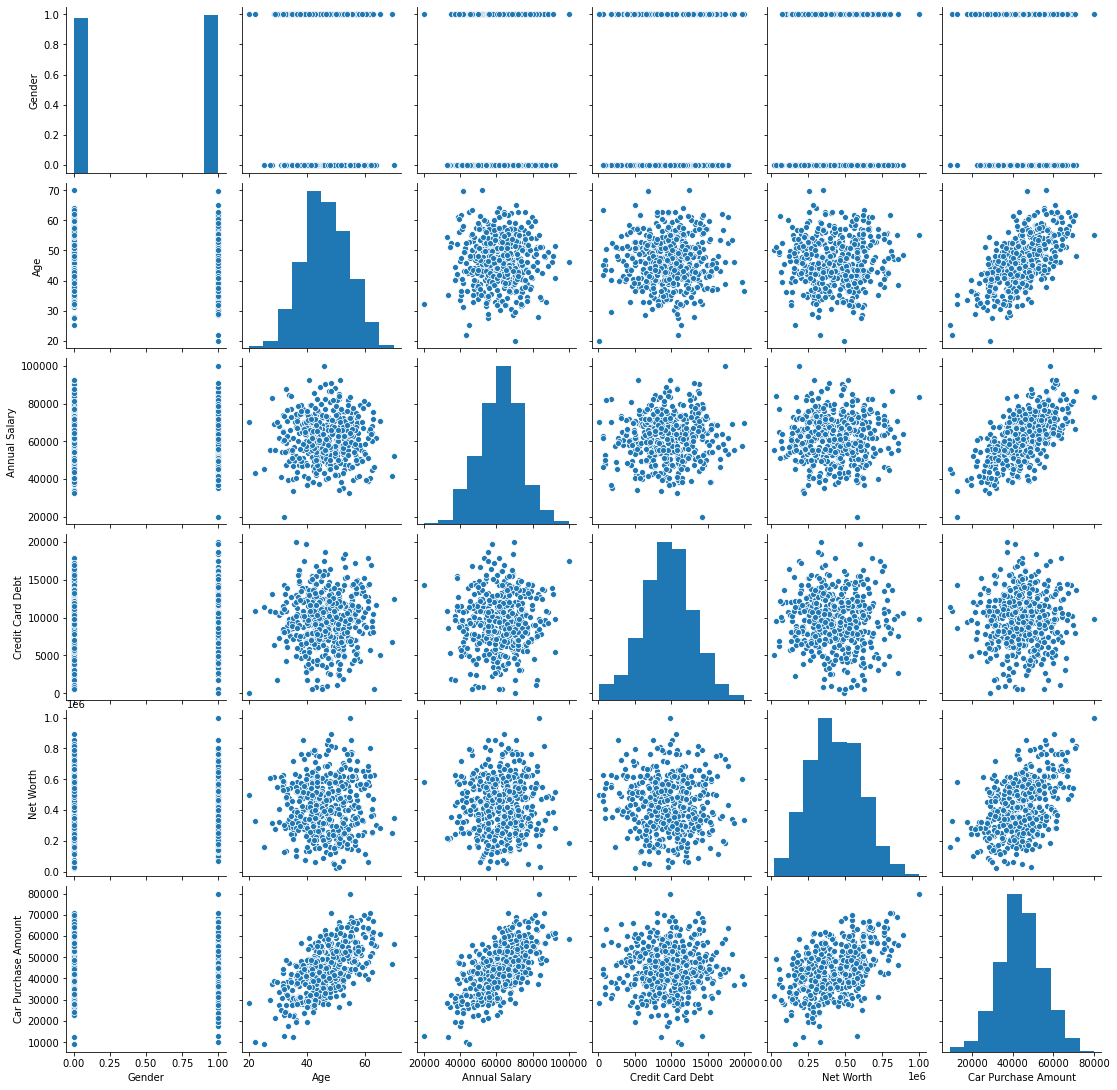

In [4]:
sns.pairplot(car_df)

Create Testing and Training Dataset/Data Cleaning

In [5]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [6]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [7]:
y = car_df['Car Purchase Amount']

In [8]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [9]:
X.shape

(500, 5)

In [10]:
y.shape

(500,)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.shape

(500, 5)

In [13]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [14]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [15]:
y = y.values.reshape(-1, 1)

In [16]:
y.shape

(500, 1)

In [17]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

In [18]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

# Training Model

In [20]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim = 5, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

Using TensorFlow backend.


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25, verbose=1, validation_split=0.2)

Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 0.4254 - val_loss: 0.2320
Epoch 2/20
300/300 [==============================] - 0s 114us/step - loss: 0.1565 - val_loss: 0.0767
Epoch 3/20
300/300 [==============================] - 0s 116us/step - loss: 0.0484 - val_loss: 0.0219
Epoch 4/20
300/300 [==============================] - 0s 99us/step - loss: 0.0141 - val_loss: 0.0106
Epoch 5/20
300/300 [==============================] - 0s 109us/step - loss: 0.0091 - val_loss: 0.0107
Epoch 6/20
300/300 [==============================] - 0s 115us/step - loss: 0.0083 - val_loss: 0.0093
Epoch 7/20
300/300 [==============================] - 0s 106us/step - loss: 0.0069 - val_loss: 0.0085
Epoch 8/20
300/300 [==============================] - 0s 141us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9/20
300/300 [==============================] - 0s 132us/step - loss: 0.0060 - val_loss: 0.0079
Epoch 10/20
300/300 [===================

In [24]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'loss'])

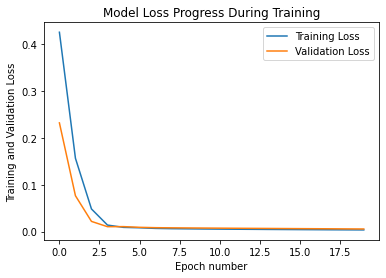

In [25]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

In [30]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth
X_test = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
y_predict = model.predict(X_test)
y_predict_ori = scaler_y.inverse_transform(y_predict)
print('Expected Purchase Amount', y_predict_ori)

Expected Purchase Amount [[38194.1]]


Expected Purchase Amount [[0.41118452]]
